# 1 Introduction

This is the first lab-sheet in the new unit Machine Learning and the Physical world. We are a diverse set of people taking this unit and with that comes many different views on machine learning and statistics. The aim of this sheet is to try and communicate a foundation that is needed to digest the material that comes later on.

The **likelihood** function expresses our belief in specific types of data if we know the parametrisation of the system.
The **prior** encodes our belief in the parameter value of the system, i.e. how likely do we believe the coin to be biased before we see data.

## 1.1 Bernoulli Trial

Common practice if you want to test something is to generate data from your model with known parameters, throw away the parameters and then see if you can recover the parameter. What we first then want to do is to sample a large set of binary outcomes. So we start of with setting μ to 0.2 and then generate 200 values from this distribution, i.e. running the system 200 iterations or tossing a coin 200 times. Then we define our prior by setting the parameters a and b. Now we can compute our posterior, we know its form, we both derived it above, but in most cases you just write it down, that is what you will do for linear regression. Now we can plot the posterior when we see more and more examples and see what will happen.

In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [3]:
def posterior(a,b,X):
    a_n = a + X.sum()
    b_n = b + (X.shape[0]-X.sum())
    return beta.pdf(mu_test,a_n,b_n)

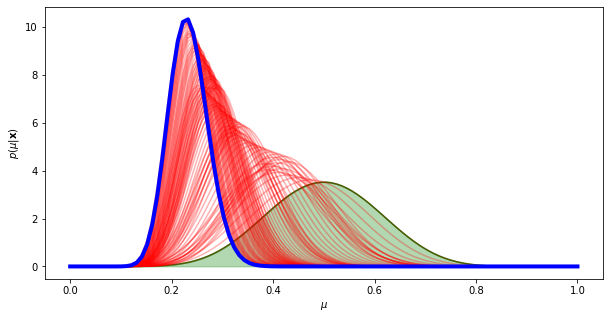

In [11]:
# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)
mu_test = np.linspace(0,1,100)

# now lets define our prior
a = 10
b = 10

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

# create figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test,prior_mu,'g')
ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

# lets pick a random (uniform) point from the data # and update our assumption with this
index = np.random.permutation(X.shape[0])
for i in range(0,X.shape[0]):
    y = posterior(a,b,X[:index[i]])
    plt.plot(mu_test,y,'r',alpha=0.3)
y = posterior(a,b,X)
plt.plot(mu_test,y,'b',linewidth=4.0)

## 1.2 Linear Regression

First visualise the prior distribution over w. As this is a two dimensional distribution we have to show this as an image. One simple way is to create a function that samples evaluates the distribution on a grid and then creates a contour plot

In [14]:
"""
   Create a contour plot of a two-dimensional normal distribution
   Parameters
   ----------
   ax : axis handle to plot
   mu : mean vector 2x1
   Sigma : covariance matrix 2x2

"""
from scipy.stats import multivariate_normal

def plotdistribution(ax,mu,Sigma):
    x = np.linspace(-1.5,1.5,100)
    x1p, x2p = np.meshgrid(x,x)
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T

    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos)
    Z = Z.reshape(100,100)
    
    ax.contour(x1p,x2p,Z, 5, colors='r', lw=5, alpha=0.7)
    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')
    return

Now we will do an iterative proceedure where we pick a random point from the data-set, compute and visualise the posterior and visualise the sample functions from the same distribution. So first combine the code to plot sample with the visualisation of the distribution and then generate a loop similar to this. You can iterate through this and add a pause statement in your loop or you can skip the loop completely and just run the code above by setting i as a variable and testing for interesting values.

In [ ]:
index = np.random.permutation(X.shape[0])
    for i in range(0, index.shape[0]):
        X_i = X[index,:]
        y_i = y[index]
        # NOT FINISHED. TO DO:
        # compute posterior
        # visualise posterior
        # visualise samples from posterior with the data
        # print out the mean of the posterior

So far we have a way of learning the parameters of the function, but the parameters is just a means to an end, what we really want is to perform predictions. This means that given a new input location x∗ we want to have a distribution over what we believe the output location to be. Of course this distribution should take into account the training data we have used to learn the weights of the function. The way to get to this point is to marginalise out the parameters of the function w. In other words generate all possible lines and weigh them with how much we believe in each of them based on what we have learned. Being that both these are Gaussian we can compute this integral again in closed form.

In [ ]:
def predictiveposterior(m0, S0, beta, x_star, X, y):
          mN, SN = posterior(m0, S0, beta, X, y)
          m_star = mN.T.dot(x_star)
          S_star = 1.0/beta + x_star.T.dot(SN).dot(x_star)
return m_star, S_star